## Experiment: Integrated model experiments (IAN/IDA)

Selected Model: 
2 layers on top of BERT: 64 and 128 
2 layers MLP: 128 and 32
lr: 2e-05
B:64
Epochs: 50

## Imports

In [11]:
##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text
from preprocessing_step import clean_text

/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/_distutils_hack/__init__.py:19: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wkhal001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import pandas as pd
import numpy as np
import collections
from collections import Counter

from sklearn.model_selection import train_test_split
import string

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import pandas as pd
import numpy as pn
from numpy import mean

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import string

import collections
from collections import Counter

from string import punctuation
from os import listdir
from numpy import array

from pickle import load
from numpy import array

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


from keras.layers import LSTM
from sklearn.decomposition import PCA

import pickle
import numpy as np
from numpy import mean
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import statistics as s

import matplotlib.pyplot as plt

import sys

/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [13]:
##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

from Baseline_Models import Display_metrics,Display_classification_report,Confusion_matrix
from keras.backend import clear_session

# Preprocessing

In [14]:
##################################################
#### functions to clean the corpus ###############
##################################################
def remove_punc(text): 
    ### only for logical feature
    string.punctuation = '!"#$%&\'()*+,-./:;=?@[\\]^_`{|}~'
    text = "".join([char for char in text if char not in string.punctuation ])
    #text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    #text = re.split('\W+',text)
    text = re.split('\s+',text)
    return text

def remove_url(text):
    text = re.sub(r'http\S+', '', text)
    return(text)

def lower_case(text):
    text = text.lower()
    return(text)

def remove_stopwords(text):
    text = [word for word in text if word not in STOPWORDS]
    return text

###### CLEAN TEXT FUNCTION #############
##   input: text
##   output: cleaned tokens
#######################################
def clean_text_pipeline(text): 
    # lower case
    text_lower = lower_case(text)
    
    # remove puntuation
    text_punc = remove_punc(text_lower) 
    
    #remove URLS
    text_url = remove_url(text_punc)
    
    # tokenization
    text_tokens = tokenization(text_url)
    
    # remove stop words
    no_stop_tokens = remove_stopwords(text_tokens)
    
    return no_stop_tokens

# BERT Architecture

In [21]:
class BERT_Arch(nn.Module):

    def __init__(self, bert, layers = None):
      
        super(BERT_Arch, self).__init__()

        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.5)
      
        # relu activation function
        self.relu =  nn.ReLU()
    

        self.fc1 = nn.Linear(768,2)
        

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask,layers = 2):

        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
      
        if layers == 2:
            x = self.fc2(x)
        
        if layers == 3: 
            x = self.fc2(x)
            x = self.fc3(x)
        
        if layers == 4: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            
        if layers == 5: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            x = self.fc5(x)
            
        
        # apply softmax activation
        x = self.softmax(x)

        return x  

# Fine-tuned BERT (Evaluation)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [20]:
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [23]:
df_training['cleaned_tweet'] = df_training['text'].apply(lambda x: " ".join(clean_text_pipeline(x)))

In [25]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=2018)

X = df_training['text']
TX = np.array(X.tolist())

Y = df_training['label']
TY= np.array(Y.tolist())

print(skf)

StratifiedKFold(n_splits=10, random_state=2018, shuffle=True)


--------- Fold  1 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9158280839682136
f1-score for class 1 ---> 0.7916666666666667
Precision for class 1 ---> 0.76
Recall for class 1 ---> 0.8260869565217391
--------- Fold  2 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.8802944661064265
f1-score for class 1 ---> 0.8695652173913043
Precision for class 1 ---> 0.8695652173913043
Recall for class 1 ---> 0.8695652173913043
--------- Fold  3 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9820325987811809
f1-score for class 1 ---> 0.8936170212765957
Precision for class 1 ---> 0.875
Recall for class 1 ---> 0.9130434782608695
--------- Fold  4 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9258695660043941
f1-score for class 1 ---> 0.9130434782608695
Precision for class 1 ---> 0.9130434782608695
Recall for class 1 ---> 0.9130434782608695
--------- Fold  5 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9573796435115773
f1-score for class 1 ---> 0.888888888888889
Precision for class 1 ---> 0.9090909090909091
Recall for class 1 ---> 0.8695652173913043
--------- Fold  6 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9891280257777031
f1-score for class 1 ---> 0.9302325581395349
Precision for class 1 ---> 0.9523809523809523
Recall for class 1 ---> 0.9090909090909091
--------- Fold  7 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9473400023400023
f1-score for class 1 ---> 0.888888888888889
Precision for class 1 ---> 0.8695652173913043
Recall for class 1 ---> 0.9090909090909091
--------- Fold  8 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9519998117824204
f1-score for class 1 ---> 0.9090909090909091
Precision for class 1 ---> 0.9090909090909091
Recall for class 1 ---> 0.9090909090909091
--------- Fold  9 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9610452935723832
f1-score for class 1 ---> 0.88
Precision for class 1 ---> 0.7857142857142857
Recall for class 1 ---> 1.0
--------- Fold  10 -------------------------
Length train index.... 4644
Length test index.... 516


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AP score for class 1 ---> 0.9202891257971593
f1-score for class 1 ---> 0.8095238095238095
Precision for class 1 ---> 0.85
Recall for class 1 ---> 0.7727272727272727


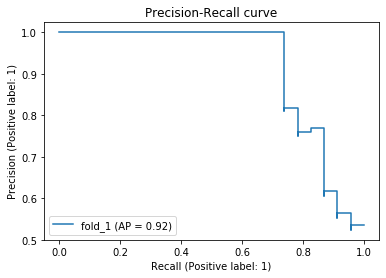

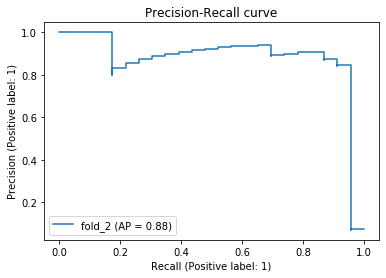

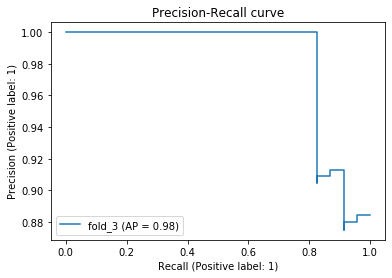

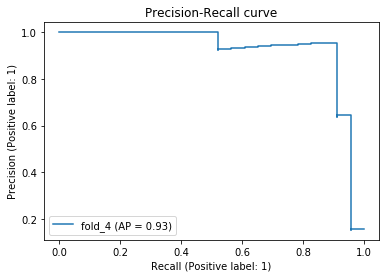

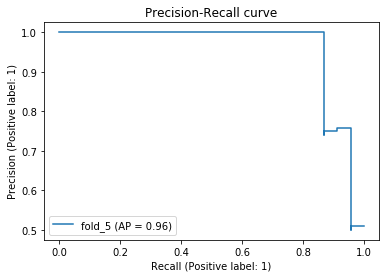

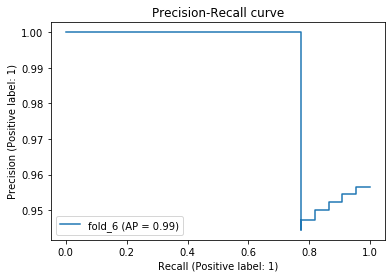

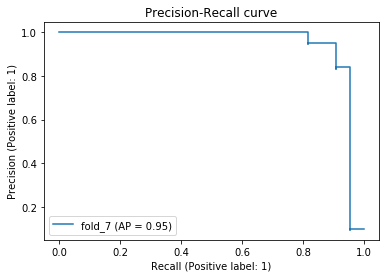

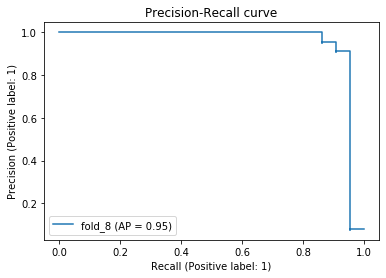

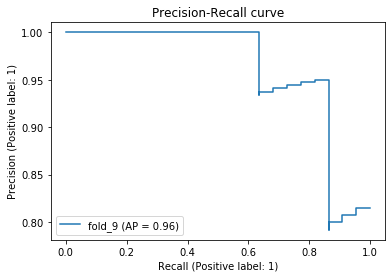

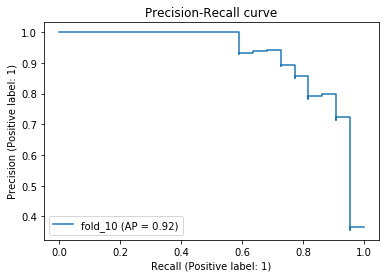

In [27]:
rep_fold = 1
Config_ls = {'lr':0.00002,'nb_epochs':4,'nb_layers':1,'max_seq':36,'batch_size':32}
save_results = {'AP':[],'f1':[],'recall':[],'precision':[]}
pos_proba_ls = []
y_tests_ls = []
y_preds_ls =[]

for train_index, test_index in skf.split(TX,TY):
    print('--------- Fold ',str(rep_fold),'-------------------------')
    print('Length train index....',len(train_index))
    print('Length test index....',len(test_index))
    
    #### training/testing data ########################################
    X_train, X_test = TX[train_index], TX[test_index]
    y_train, y_test = TY[train_index], TY[test_index]    
    
    ##############################
    #### parameters ##############
    ##############################
    learning_rate = Config_ls['lr']
    nb_epochs = Config_ls['nb_epochs']
    max_seq = Config_ls['max_seq']
    batch_size = Config_ls['batch_size']
    nb_layers =Config_ls['nb_layers']
    ##############################
    ##############################
    ##############################

    # import BERT-base pretrained model
    bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

    # Load the BERT tokenizer
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased

    # freeze all the parameters
    nb_layers = 1
    for param in bert.parameters():
        param.requires_grad = True

    # pass the pre-trained BERT to our define architecture
    model_bert_best = BERT_Arch(bert,nb_layers)

    # push the model to GPU
    model_bert_best = model_bert_best.to(device)
    
    ### load pretrained model ########
    based_path_loaded_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Fine-tuned_BERT_IAN_IDA/10CV_models(2)/bert_weights_fold_'
    model_path = based_path_loaded_model + str(rep_fold) + '.pt'
    
    model_bert_best.load_state_dict(torch.load(model_path))
    model_bert_best.eval()

    # parameter 1
    max_seq_len = max_seq   ######### parameter 1 ###################

    # tokenize and encode sequences in the validation set
    tokens_test = tokenizer.batch_encode_plus(
            X_test.tolist(),
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )                                                                

    # for test set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])
    test_y = torch.tensor(y_test.tolist())

    #### test on the testing set #######  
    with torch.no_grad():
        preds_model = model_bert_best(test_seq.to(device), test_mask.to(device),nb_layers)
        preds_pr = preds_model.detach().cpu().numpy()
        preds = np.argmax(preds_pr, axis = 1)

    df_list = [X_test,preds,test_y.tolist()]
    df = pd.DataFrame(df_list, index=['test_X','preds','test_y']).T
    file_path = 'bert_res_fold_' + str(rep_fold) + '.csv'
    #df.to_csv(file_path)

    pos_probs = preds_pr[:, 1]
    pos_proba_ls.append(pos_probs)
    y_tests_ls.append(y_test.tolist())
    y_preds_ls.append(preds)
    
    fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    print("AP score for class 1 --->",fold_AP)
    save_results['AP'].append(fold_AP)
    
    name_plot_fold = 'fold_' + str(rep_fold)
    name_plot_fold_output = 'fold_' + str(rep_fold) + '.png'
    display = PrecisionRecallDisplay.from_predictions(y_test.tolist(), pos_probs, name=name_plot_fold)
    _ = display.ax_.set_title("Precision-Recall curve")
    plt.savefig(name_plot_fold_output)

    cr_dict = classification_report(y_test.tolist(), preds,output_dict = True)
    f_score = f1_score(y_test.tolist(), preds, labels=np.unique(preds),average='binary')
    print("f1-score for class 1 --->",f_score)
    save_results['f1'].append(f_score)

    precision_score = cr_dict['1']['precision']
    print("Precision for class 1 --->",precision_score)
    save_results['precision'].append(precision_score)

    #recall_score = recall_score(test_y, preds, average='binary')   #micro  #binary
    recall_score = cr_dict['1']['recall']
    print("Recall for class 1 --->",recall_score)
    save_results['recall'].append(recall_score)

    cm = confusion_matrix(y_test.tolist(), preds, labels=np.unique(y_test.tolist()))

    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test.tolist()))

    del model_bert_best
    torch.cuda.empty_cache()
    rep_fold = rep_fold + 1

    

In [28]:
import statistics

print('---------------- Fine-tuned BERT 10-cv results----------------')
print('average F1',statistics.mean(save_results['f1']))
print('stdev F1',statistics.stdev(save_results['f1']))
print('\n')

print('average recall',statistics.mean(save_results['recall']))
print('stdev recall',statistics.stdev(save_results['recall']))
print('\n')

print('average precision',statistics.mean(save_results['precision']))
print('stdev precision',statistics.stdev(save_results['precision']))
print('\n')

print('average AP',statistics.mean(save_results['AP']))
print('stdev AP',statistics.stdev(save_results['AP']))
print('--------------------------------------------------------------')

---------------- Fine-tuned BERT 10-cv results----------------
average F1 0.8774517438127467
stdev F1 0.04424493705913978


average recall 0.8891304347826087
stdev recall 0.06048026412986514


average precision 0.8693450969320534
stdev precision 0.05899221361737003


average AP 0.9431206617641461
stdev AP 0.032935904951660266
--------------------------------------------------------------


# Run Logic-based Model on Ian/Ida data set

In [39]:
def clean_text(text):
    # Create a string of all punctuation except for #
    punctuation_to_remove = string.punctuation.replace('#', '')
    # Remove the specified punctuation using regular expressions
    cleaned_text = re.sub(f"[{re.escape(punctuation_to_remove)}]", " ", text)
    return cleaned_text

In [41]:
import re

def clean_whitespace(text):
    # Replace one or more whitespace characters with a single space
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text.strip()  # Remove leading and trailing whitespace

# Example usage
text = "This   is    a   test.\nWith multiple\twhitespace characters."
cleaned_text = clean_whitespace(text)
print(cleaned_text)


This is a test. With multiple whitespace characters.


In [42]:
def bigram_exist(word1,word2,sentence):
    if (word1 in sentence) and (word2 in sentence): 
        return 1
    else: 
        return 0    
    
def trigram_exist(word1,word2,word3,sentence):
    if (word1 in sentence) and (word2 in sentence) and (word3 in sentence): 
        return 1
    else: 
        return 0  

In [43]:
################################################################################################
################################################################################################
################################################################################################
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found

def Calculate_logical_filters(Train_X): #Train_X: array of tweets 
    ls_crisis_hashtags_ida = ['HELP','urgent','NeedRescue','louisiana','HurricaneIda','hurricaneIda','idarescue','Ida','ida','idarescue','flood','sendhelp','Rescue','rescue'
                      ,'laplace','IdaSOS','PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','LaPlace','FEMA','idahurricane']
    
    ls_crisis_hashtags_ian = ['HELP','Ian','IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','fortmyers','FtMyers','FortMyersBeach','NaplesFL'
                      ,'FloridaFlood','IanHELP','HurricaneIan','PLEASEHELP','URGENT','Fort','Florida','WestPalm','CajunNavy','CrowdSourceRescue']
    
    ls_hashtag_mixed = ['HELP','urgent','NeedRescue','idarescue','idarescue','IdaRescue','sendhelp','Rescue','rescue','IdaSOS',
                        'PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','FEMA','idahurricane',
                        'IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','IanHELP','HurricaneIan','PLEASEHELP',
                        'URGENT','CajunNavy','CrowdSourceRescue','URGENT','SOSfromIda','SendHelp','sendhelp','MEDICAL']
    
    ls_crisis_hashtags_harvey = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']
    
    #--------------------  Create filter 1 ---------------------------------------#
    # Feature 1.1 keywords with hurricane/flood
    #rgx_f1_1 = "\\b(hurricaneida|HurricaneIda|idahelp|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda)\\b"
    #rgx_f1_1_ian = "\\b(Hurricane|HurricaneIan|Ian2022|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding|HurricaneFlood|HurricaneSOS)\\b"
    rgx_f1_1 = "\\b(hurricaneida|HurricaneIan|Hurricaneian|HurricaneIda|idahelp|floods|floodwaters|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding)\\b"
    #rgx_f1_h = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"
    
    ## Feature 1.2 keywords with situation descriptions / identify bigrams
    rgx_f1_2 = "\\b(Attic|stranded|stuck|trapped|traps?|trapping|roof|collapsed|collapsing|roofs?|rooftop|Atic|injured|hurt)\\b"
    situ_description_bigrams = [('water','rising'),('water','up'),('flooded','house'),('flooded','area'),('house','fire'),('first','floor'),('second','floor'),('no','contact'),('not','responding'),('2nd','floor')]
    situ_description_trigrams = [('anyone','get','them'),('cant','reach','him'),('water','coming','through'),('out','contact','since'),('cant','get','ahold')]
    rgx_f1_2_h = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"
    
    #Feature 1.3 keywords for people in the emergency situation
    rgx_f1_3 = "\\b(PPL|ppl|Ppl|senior|female|adults|Adults|residents|babies|baby|adult?|family|relatives|mom|dad|grandparents|children|child|grandma|grandpa|kids|aunts?|people|parents|Parents|kids|cousin|nanny|elderly|brother|mother|pregnant)\\b"
    people_need_help_bigrams = [('disabled','woman'),('unreachable','person'),('missing','family'),('elderly','friends'),('elderly','folks'),('please','check'),('elderly','woman'),('father','law'),('pregnant','woman'),('step','sister'),('family','members'),('flooded','house'),('need','rescue')]
    
    # Feature 1.3: contain both the following two keyword groups (ignore case):
    # group 1: names of cities and towns near Houston
    # group 2: flood related keywords. e.g. flood, flooding
    rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
    rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"

    #------------------ Create filter 2: Requesting rescue ------------------------#
    #rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|idaRescue|idaSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    #rgx_f2_ian = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|ianRescue|ianSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    rgx_f2 = "\\b(HELP!|SOS|rescue|rescues|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|HurricaneSOS|boats?|IanRescue|idsSOS|IdaResuce|ianrescue|idarescue|FloodRescue)\\b"
    call_help = [('can t', 'reach'),('wellness','check'),('anyone','help'),('call','help'),('please','help'),('please','share'),('needs','help'),('send','help'),('need','rescue'),('send','help'),('help','needed'),('check','on')]         
    rgx_f2_h = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"
    
    # ------ Create filter 3: address description-----------------------------------#
    address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|Laplace|laplace|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
    #address_pattern2 = "\\b\\d{1,6}\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#).?(\\d+|[A-z])\\b"
    non_address_pattern = "\\b\\d+\\s+(miles|am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"
    
    # ------ Create filter 4: with key words of tweets about political -------#
    rgx_f4 = "\\b(@POTUS|@potus|Biden|Potus|JoeBiden|Afghanistan|Election|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    rgx_f4_ian = "\\b(Potus|Biden|realDonaldTrump|DeSantis|RonDesantis|Governor|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    # all tweets about ICE and buzzfeed are polical ones
    #@POTUS|@potus
    rgx_f4_h = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
    # all tweets about ICE and buzzfeed are polical ones

    # ------ Create filter 5: with key words of tweets about offering helps -------#
    rgx_f5 = "\\b(open|public|financial|money|shelter|clothing|Distribution|distribution|free|FREE|supplies|donate|organize|organizing|adoptions|adopt|donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    rgx_f5_h = "\\b(donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    #food #|pallet|forklift
    
    # ------ Create filter 6: with key words of tweets about commercial -------#
    rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    rgx_f6_h = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    
    # ------ Create filter 7: with key words of tweets of newsreport -------#
    rgx_f7 = "#BREAKING:\\s+|\\b(Radio|radio|Press\\sConference|YouTube|Livestream|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ida|Ahead\\s+of\\s+Hurricane\\s+Ida|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    rgx_f7_2 = "\\b(NEW:|new:|news:|NEWS:|@nbcnews)\\b"
    #rgx_f7_ian = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Ian|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ian|Ahead\\s+of\\s+Hurricane\\s+Ian|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"    
    #rgx_f7_h = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    # SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
    # typically used by news
    
    
    # ------ Create filter 8: rescue status update --------------#
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued?\\b|-\\bsending\\sprayers\\b|prayers|pray|praying"
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\prayers!\\b|-\\spraying!\\b"
    rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|Dispatched|dispatched|Rescued\?|rescued\?|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\ssending\\sprayers?\\b|-\\sprayers\\s|-\\spraying\\s|heading|reported|info|waiting|WAITING|hoping|HOPING"
    #rgx_f8_h = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"
    #safe|SAFE
    
    # ------ Create filter 9: Thoughts and prayers and animal adoption --------------#
    #rgx_f9 = "\\b(pray|prayers|praying|thoughts|Lord|LORD|God|god|bless|evacuated?|puppy|adopt|adoption|#puppylove|#dogrescue|shelter)\\b"
    
    ########################################################################################
    ######## extract relevant filters  #####################################################
    ########################################################################################
    train_data_integrated_non_cleaned = []
    for s in Train_X: 
        #clean_sen = clean_text(s)
        train_data_integrated_non_cleaned.append(s) #clean_sen
    
    #train_data_integrated_non_cleaned = Train_X

    train_logical_features = []
    for v in train_data_integrated_non_cleaned: 
        
        ##### feature 1.1 ######
        f1_1 = 0
        if re.findall(rgx_f1_1,v,re.IGNORECASE): #or re.findall(rgx_f1_1_ian,v,re.IGNORECASE)  :
            f1_1 =1     

        ##### feature 1.2 ######
        f1_2 = 0
        if re.findall(rgx_f1_2,v,re.IGNORECASE):
            f1_2=1     

        f1_2_1 =0
        for i in situ_description_bigrams:
            if bigram_exist(i[0],i[1],v):
                 f1_2 = 1   #f1_2_1=1 
        f1_2_2 =0
        for i in situ_description_trigrams:
            if trigram_exist(i[0],i[1],i[2],v):
                 f1_2 = 1   #f1_2_2=1
                    
        ##### feature 1.3 ######  
        f1_3 = 0
        if re.findall(rgx_f1_3,v,re.IGNORECASE):
            f1_3=1
        for i in people_need_help_bigrams:
            if bigram_exist(i[0],i[1],v):
                 f1_3=1
                    
                 
        ##### feature 1.4 (hashtags) ######
        f1_4 =0
        if extract_hash_tags(v,ls_hashtag_mixed) == True:
            f1_4 =1
      
        ##### feature 2 (rescue keywords and expressions) ######
        f2=0
        if re.findall(rgx_f2,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1  
        if re.findall(rgx_f2_h,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1 
            
        f2_1 = 0
        for i in call_help:
            if bigram_exist(i[0],i[1],v):
                f2 = 1 #f2_1=1

        ##### feature 3 (address pattern) ######
        if re.findall(address_pattern,v,re.IGNORECASE): #or re.findall(address_pattern2,v,re.IGNORECASE):
            f3_1=1
        else:
            f3_1=0
            
        if re.findall(non_address_pattern,v,re.IGNORECASE):
            f3_2=1
        else:
            f3_2=0        
            
            
        ##### feature 4 (political tweets) ######
        f4=0
        if re.findall(rgx_f4,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  
        if re.findall(rgx_f4_h,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  

            
        ##### feature 5 (offering help) ######
        f5=0
        if re.findall(rgx_f5,v,re.IGNORECASE):
            f5=1
        if re.findall(rgx_f5_h,v,re.IGNORECASE):
            f5=1

            
        ##### feature 6 (commercials) ######
        f6=0
        if re.findall(rgx_f6_h,v,re.IGNORECASE):
            f6=1
        else:
            f6=0
            
        
        ##### feature 7 (news reports) ######
        f7=0
        if re.findall(rgx_f7,v,re.IGNORECASE):
            f7=1
        if re.findall(rgx_f7_2,v,re.IGNORECASE):
            f7=1  

        ##### feature 8 (rescue updates) ######
        f8=0
        if re.findall(rgx_f8,v,re.IGNORECASE):
            f8=1
        
#         ##### feature 9 (prayers and thoughts) ######
#         f9 =0 
#         if re.findall(rgx_f9,v,re.IGNORECASE):
#             f9 = 1

        train_logical_features.append([v,f1_1,f1_2,f1_3,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8]) #f9  ##13 features ## 16 features

    return(train_logical_features)

def expand_list(l=[]):
    l2 = [[i]*5 for i in l]
    l3 = []
    for j in l2:
        l3 = l3 + j
    return(l3)

In [46]:
####################################################################################
##### Build logical features #######################################################
####################################################################################
Fold_train_logical_filters = Calculate_logical_filters(df_training['text'])

In [44]:
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


def evaluate_expression(f1_1,f1_2,f1_3,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8): #f9
    f1 = f1_1 or f1_2 or f1_3 or f1_4
    f3 = logical_evaluation_address(f3_1,f3_2)
    f1_union_f2= f1 or f2
    f1_f2_intersect_f3 = f1_union_f2 and f3
    excluded_filters = f4 or f5 or f6 or f7 or f8 #or f9
    return logical_evaluation_final(f1_f2_intersect_f3,excluded_filters)

In [45]:
#######################################################
## Calculate predictions using logical filters only ###
#######################################################
tweet = []
preds = []
F1_1 = []
F1_2 = []
F1_3 = []
F1_4 = []
F2 = []
F3_1 = []
F3_2 = []
F4 =[]
F5 =[]
F6 =[]
F7 =[]
F8 =[]
#F9 = []

for e in Fold_train_logical_filters:
    tweet.append(e[0])
    F1_1.append(e[1])
    F1_2.append(e[2])
    F1_3.append(e[3])
    F1_4.append(e[4])
    F2.append(e[5])
    F3_1.append(e[6])
    F3_2.append(e[7])
    F4.append(e[8])
    F5.append(e[9])
    F6.append(e[10])
    F7.append(e[11])
    F8.append(e[12])
    #F9.append(e[13])
    
    pred = evaluate_expression(e[1],e[2],e[3],e[4],e[5],e[6],e[7],e[8],e[9],e[10],e[11],e[12]) #e[13]
    preds.append(pred)
    

In [46]:
### Created data frame
import pandas as pd 

data = {
    'tweet':tweet,
    'F1_1':F1_1,
    'F1_2':F1_2,
    'F1_3':F1_3,
    'F1_4':F1_3,
    'F2':F2,
    'F3_1':F3_1,
    'F3_2':F3_2,
    'F4':F4,
    'F5':F5,
    'F6':F6,
    'F7':F7,
    'F8':F8,
    'pred':preds
}
#    'F9':F9,

df = pd.DataFrame(data)

In [48]:
##########################
### Add ground Truth #####
##########################
GT = df_training['label'].to_list()

In [49]:
len(GT)

5160

In [50]:
df['label'] = GT

# Integrated Model (training using 10 fold CV)

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")
device

device(type='cuda')

In [36]:
def bigram_exist(word1,word2,sentence):
    if (word1 in sentence) and (word2 in sentence): 
        return 1
    else: 
        return 0    
    
def trigram_exist(word1,word2,word3,sentence):
    if (word1 in sentence) and (word2 in sentence) and (word3 in sentence): 
        return 1
    else: 
        return 0  

In [39]:
################################################################################################
################################################################################################
################################################################################################
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found

def Calculate_logical_filters(Train_X): #Train_X: array of tweets 
    ls_crisis_hashtags_ida = ['HELP','urgent','NeedRescue','louisiana','HurricaneIda','hurricaneIda','idarescue','Ida','ida','idarescue','flood','sendhelp','Rescue','rescue'
                      ,'laplace','IdaSOS','PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','LaPlace','FEMA','idahurricane']
    
    ls_crisis_hashtags_ian = ['HELP','Ian','IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','fortmyers','FtMyers','FortMyersBeach','NaplesFL'
                      ,'FloridaFlood','IanHELP','HurricaneIan','PLEASEHELP','URGENT','Fort','Florida','WestPalm','CajunNavy','CrowdSourceRescue']
    
    ls_hashtag_mixed = ['HELP','urgent','NeedRescue','idarescue','idarescue','IdaRescue','sendhelp','Rescue','rescue','IdaSOS',
                        'PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','FEMA','idahurricane',
                        'IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','IanHELP','HurricaneIan','PLEASEHELP',
                        'URGENT','CajunNavy','CrowdSourceRescue','URGENT','SOSfromIda','SendHelp','sendhelp','MEDICAL']
    
    ls_crisis_hashtags_harvey = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']
    
    #--------------------  Create filter 1 ---------------------------------------#
    # Feature 1.1 keywords with hurricane/flood
    #rgx_f1_1 = "\\b(hurricaneida|HurricaneIda|idahelp|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda)\\b"
    #rgx_f1_1_ian = "\\b(Hurricane|HurricaneIan|Ian2022|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding|HurricaneFlood|HurricaneSOS)\\b"
    ######## rgx_f1_1 = "\\b(hurricaneida|HurricaneIan|Hurricaneian|HurricaneIda|idahelp|floods|floodwaters|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding)\\b"
    rgx_f1_1 = "\\b(ianhelp|idahelp|floods|floodwaters|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding)\\b"
    #rgx_f1_h = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"
    
    ## Feature 1.2 keywords with situation descriptions / identify bigrams
    rgx_f1_2 = "\\b(Attic|stranded|stuck|trapped|traps?|trapping|roof|collapsed|collapsing|roofs?|rooftop|Atic|injured|hurt)\\b"
    situ_description_bigrams = [('water','rising'),('water','up'),('flooded','house'),('flooded','area'),('house','fire'),('first','floor'),('second','floor'),('no','contact'),('not','responding'),('2nd','floor')]
    situ_description_trigrams = [('anyone','get','them'),('cant','reach','him'),('water','coming','through'),('out','contact','since'),('cant','get','ahold')]
    rgx_f1_2_h = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"
    
    #Feature 1.3 keywords for people in the emergency situation
    rgx_f1_3 = "\\b(PPL|ppl|Ppl|senior|female|adults|residents|babies|baby|adult|family|relatives|mom|dad|grandparents|children|child|grandma|grandpa|kids|aunts?|people|parents|Parents|kids|cousin|nanny|elderly|brother|mother|pregnant)\\b"
    people_need_help_bigrams = [('disabled','woman'),('unreachable','person'),('missing','family'),('elderly','friends'),('elderly','folks'),('please','check'),('elderly','woman'),('father','law'),('pregnant','woman'),('step','sister'),('family','members')]
    
    # Feature 1.3: contain both the following two keyword groups (ignore case):
    # group 1: names of cities and towns near Houston
    # group 2: flood related keywords. e.g. flood, flooding
    rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
    rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"

    #------------------ Create filter 2: Requesting rescue ------------------------#
    #rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|idaRescue|idaSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    #rgx_f2_ian = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|ianRescue|ianSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    rgx_f2 = "\\b(HELP!|SOS|rescue|rescues|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|HurricaneSOS|boats?|IanRescue|idsSOS|IdaResuce|ianrescue|idarescue|FloodRescue)\\b"
    call_help = [('cant', 'reach'),('wellness','check'),('anyone','help'),('call','help'),('please','help'),('please','share'),('needs','help'),('send','help'),('need','rescue'),('need','help'),('send','help'),('help','needed'),('check','on')]         
    rgx_f2_h = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"
    
    # ------ Create filter 3: address description-----------------------------------#
    address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|Laplace|laplace|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
    #address_pattern2 = "\\b\\d{1,6}\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#).?(\\d+|[A-z])\\b"
    non_address_pattern = "\\b\\d+\\s+(miles|am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"
    
    # ------ Create filter 4: with key words of tweets about political -------#
    rgx_f4 = "\\b(@POTUS|@potus|Biden|Potus|JoeBiden|Afghanistan|Election|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    rgx_f4_ian = "\\b(Potus|Biden|realDonaldTrump|DeSantis|RonDesantis|Governor|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    # all tweets about ICE and buzzfeed are polical ones
    #@POTUS|@potus
    rgx_f4_h = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
    # all tweets about ICE and buzzfeed are polical ones

    # ------ Create filter 5: with key words of tweets about offering helps -------#
    rgx_f5 = "\\b(open|public|financial|money|shelter|clothing|Distribution|distribution|free|FREE|supplies|donate|organize|organizing|adoptions|adopt|donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    rgx_f5_h = "\\b(donate|donating|donated|operate|operating|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    #food #|pallet|forklift
    
    # ------ Create filter 6: with key words of tweets about commercial -------#
    rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    rgx_f6_h = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    
    # ------ Create filter 7: with key words of tweets of newsreport -------#
    rgx_f7 = "#BREAKING:\\s+|\\b(Radio|radio|Press\\sConference|YouTube|Livestream|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ida|Ahead\\s+of\\s+Hurricane\\s+Ida|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    rgx_f7_2 = "\\b(NEW:|new:|news:|NEWS:|@nbcnews)\\b"
    #rgx_f7_ian = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Ian|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ian|Ahead\\s+of\\s+Hurricane\\s+Ian|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"    
    #rgx_f7_h = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    # SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
    # typically used by news
    
    
    # ------ Create filter 8: rescue status update --------------#
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued?\\b|-\\bsending\\sprayers\\b|prayers|pray|praying"
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\prayers!\\b|-\\spraying!\\b"
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|Dispatched|dispatched|Rescued\?|rescued\?|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\ssending\\sprayers?\\b|-\\sprayers\\s|-\\spraying\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\bheading|reported|info|waiting|WAITING|hoping|HOPING"
    rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|dispatched|Rescued\?|rescued|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\ssending\\sprayers?\\b|-\\sprayers\\s|-\\spraying\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\bheading|updates|found|reported|waiting|WAITING|hoping|HOPING"
    status_update_bigrams = [('not','urgent'),('damage','info'),('damage','information'),('found','safe')]
    #rgx_f8_h = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"
    #safe|SAFE
    
    # ------ Create filter 9: Thoughts and prayers and animal adoption --------------#
    rgx_f9 = "\\b(pray|prayers|praying|thoughts|Lord|LORD|God|god|bless|evacuated?|puppy|adopt|adoption|#puppylove|#dogrescue|shelter)\\b"
    
    ########################################################################################
    ######## extract relevant filters  #####################################################
    ########################################################################################
    train_data_integrated_non_cleaned = []
    for s in Train_X: 
        #clean_sen = clean_text(s)
        train_data_integrated_non_cleaned.append(s) #clean_sen
    
    #train_data_integrated_non_cleaned = Train_X

    train_logical_features = []
    for v in train_data_integrated_non_cleaned: 
        
        ##### feature 1.1 ######
        f1_1 = 0
        if re.findall(rgx_f1_1,v,re.IGNORECASE): #or re.findall(rgx_f1_1_ian,v,re.IGNORECASE)  :
            f1_1 =1     

        ##### feature 1.2 ######
        f1_2 = 0
        if re.findall(rgx_f1_2,v,re.IGNORECASE):
            f1_2=1     

        f1_2_1 =0
        for i in situ_description_bigrams:
            if bigram_exist(i[0],i[1],v):
                f1_2 = 1   
                f1_2_1=1 
        f1_2_2 =0
        for i in situ_description_trigrams:
            if trigram_exist(i[0],i[1],i[2],v):
                f1_2 = 1   
                f1_2_2=1
                    
        ##### feature 1.3 ######  
        f1_3 = 0
        if re.findall(rgx_f1_3,v,re.IGNORECASE):
            f1_3=1
        f1_3_1 = 0
        for i in people_need_help_bigrams:
            if bigram_exist(i[0],i[1],v):
                f1_3=1
                f1_3_1 = 1
                    
                 
        ##### feature 1.4 (hashtags) ######
        f1_4 =0
        if extract_hash_tags(v,ls_hashtag_mixed) == True:
            f1_4 =1
      
        ##### feature 2 (rescue keywords and expressions) ######
        f2=0
        if re.findall(rgx_f2,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1  
        if re.findall(rgx_f2_h,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1 
            
        f2_1 = 0
        for i in call_help:
            if bigram_exist(i[0],i[1],v):
                f2 = 1 
                f2_1=1

        ##### feature 3 (address pattern) ######
        if re.findall(address_pattern,v,re.IGNORECASE): #or re.findall(address_pattern2,v,re.IGNORECASE):
            f3_1=1
        else:
            f3_1=0
            
        if re.findall(non_address_pattern,v,re.IGNORECASE):
            f3_2=1
        else:
            f3_2=0        
            
            
        ##### feature 4 (political tweets) ######
        f4=0
        if re.findall(rgx_f4,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  
        if re.findall(rgx_f4_h,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  
            
        ##### feature 5 (offering help) ######
        f5=0
        if re.findall(rgx_f5,v,re.IGNORECASE):
            f5=1
        if re.findall(rgx_f5_h,v,re.IGNORECASE):
            f5=1

            
        ##### feature 6 (commercials) ######
        f6=0
        if re.findall(rgx_f6_h,v,re.IGNORECASE):
            f6=1
        else:
            f6=0
        
        ##### feature 7 (news reports) ######
        f7=0
        if re.findall(rgx_f7,v,re.IGNORECASE):
            f7=1
        if re.findall(rgx_f7_2,v,re.IGNORECASE):
            f7=1  

        ##### feature 8 (rescue updates) ######
        f8=0
        if re.findall(rgx_f8,v,re.IGNORECASE):
            f8=1
        for i in status_update_bigrams:
            if bigram_exist(i[0],i[1],v):
                f8 = 1 

        #train_logical_features.append([v,f1_1,f1_2,f1_3,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8]) #f9  ##13 features ## 16 features
        train_logical_features.append([v,f1_2,f1_2_1,f1_2_2,f1_3,f1_4,f2,f2_1,f3_1,f3_2,f4,f5,f6,f7,f8]) #f9  ##13 features ## 16 features
        #f1_1
    return(train_logical_features)

def expand_list(l=[]):
    #l2 = [[i]*5 for i in l]
    #l2 = [[i]*15 for i in l]
    l2 = [[i]*30 for i in l]
    #l2 = [[i]*15 for i in l]
    l3 = []
    for j in l2:
        l3 = l3 + j
    return(l3)

In [41]:
Config_ls = {'lr':0.00005,'nb_epochs':20,'nb_layers':1,'max_seq':36,'batch_size':64}
save_results = {'AP':[],'f1':[],'recall':[],'precision':[]}
ls_save_results = []
pos_proba_ls = []
y_tests_ls = []
preds_AP = []

In [42]:
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten

from transformers import AutoModel, BertTokenizerFast
import torch
import numpy as np
from tensorflow.keras.layers import Input, Dense, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, average_precision_score, PrecisionRecallDisplay


In [43]:
####################################################################################
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=2018)

X = df_training['text']
TX = np.array(X.tolist())

Y = df_training['label']
TY= np.array(Y.tolist())
####################################################################################

In [1]:
rep_fold = 1
pos_proba_ls = []
preds_ls = []
y_tests_ls = []

for train_index, test_index in skf.split(TX,TY):
    print('--------- Fold ',str(rep_fold),'-------------------------')
    print('Length train index....',len(train_index))
    print('Length test index....',len(test_index))
    
    #### training/testing data ########################################
    X_train, X_test = TX[train_index], TX[test_index]
    y_train, y_test = TY[train_index], TY[test_index]
        
    ####################################################################################
    ##### Build logical features #######################################################
    ####################################################################################
    Fold_train_logical_filters = Calculate_logical_filters(X_train)
    Fold_test_logical_filters = Calculate_logical_filters(X_test)

    print('Length training data (logic)',len(Fold_train_logical_filters))
    print('Length testing data (logic)',len(Fold_test_logical_filters))
    print('Length training vectors (logic)',len(Fold_train_logical_filters[0]))
    print('Length testing vectors (logic)',len(Fold_test_logical_filters[0]))
    
    expanded_train_logical = []
    for e in Fold_train_logical_filters:
        l = e[1:]
        expanded_e = expand_list(l)
        expanded_train_logical.append(expanded_e) 
    
        
    expanded_test_logical = []
    for e in Fold_test_logical_filters: #logical_test_loc   #test_logical_features
        l = e[1:]
        expanded_e = expand_list(l)
        expanded_test_logical.append(expanded_e)  

    print('Length expanded logical feature vector',len(expanded_train_logical[0]))
    print('Length expanded logical feature vector',len(expanded_test_logical[0]))
    
    length_logical_vec = len(expanded_train_logical[0])
    
    ####################################################################################
    ##### Build BERT features ##########################################################
    ####################################################################################
    # import BERT-base pretrained model
    bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

    # Load the BERT tokenizer
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased
    
    nb_layers = 1
    for param in bert.parameters():
        param.requires_grad = True
        
    # pass the pre-trained BERT to our define architecture
    fine_tuned_bert_model = BERT_Arch(bert,nb_layers)
    based_path_loaded_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Fine-tuned_BERT_IAN_IDA/10CV_models(2)/bert_weights_fold_'
    model_path = based_path_loaded_model + str(rep_fold) + '.pt'
    
    fine_tuned_bert_model.load_state_dict(torch.load(model_path))
    fine_tuned_bert_model.eval()
    
    # parameter 1
    max_seq_len = 36   ######### parameter 1 ###################
    
    ### clean X-train for BERT #####
    cleaned_train_list= []
    for e in X_train:
        #cleaned_tweet = clean_text(e)
        #tweet_clean = ' '.join(cleaned_tweet)
        #cleaned_train_list.append(" ".join(clean_text_pipeline(e)))
        cleaned_train_list.append(" ".join(clean_text_pipeline(e)))
                                      
    cleaned_test_list= []
    for e in X_test:
        #cleaned_tweet = clean_text(e)
        #tweet_clean = ' '.join(cleaned_tweet)
        #cleaned_test_list.append(tweet_clean)
        cleaned_test_list.append(" ".join(clean_text_pipeline(e)))
    ################################

    # tokenize and encode sequences in the training set
    tokens_train = tokenizer.batch_encode_plus(
                X_train.tolist(),     #cleaned_train_list                
                padding='max_length',
                max_length = max_seq_len,
                truncation=True,
                return_token_type_ids=False
            )

    # tokenize and encode sequences in the validation set
    tokens_test = tokenizer.batch_encode_plus(
            X_test.tolist(),            #cleaned_test_list                     
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )                                                                

    # for train set
    train_seq = torch.tensor(tokens_train['input_ids'])
    train_mask = torch.tensor(tokens_train['attention_mask'])
    train_y = torch.tensor(y_train.tolist())

    # for test set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])
    test_y = torch.tensor(y_test.tolist())

    with torch.no_grad():
        outputs = fine_tuned_bert_model.bert(train_seq,train_mask)

    with torch.no_grad():
        outputs_test = fine_tuned_bert_model.bert(test_seq,test_mask)

    ls_input_train = [e.numpy() for e in outputs[1]]
    ls_input_test = [e.numpy() for e in outputs_test[1]] 

    print('Length training data (bert)',len(ls_input_train))
    print('Length testing data (bert)',len(ls_input_test))
    print('Length training vectors (bert)',len(ls_input_train[0]))
    print('Length testing vectors (bert)',len(ls_input_test[0]))
    
    ####################################################################################
    ##### Build integrated architecture ################################################
    ####################################################################################

    #### parameters ##############
    learning_rate = Config_ls['lr']
    nb_epochs = Config_ls['nb_epochs']
    max_seq = Config_ls['max_seq']
    batch_size = Config_ls['batch_size']
    nb_layers =Config_ls['nb_layers']
    ##############################

    input_bert = Input(shape=(768,))
    input_logical = Input(shape=(length_logical_vec,)) #55 #60 ##80 #35
    
    base_integrated_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Integrated_model_ian_ida(2)/Results_integrated_new_models/integrated__'
    model_integrated_path = base_integrated_model + str(rep_fold)+ '.h5' 
    
    ########################################
    ############# Build model ##############
    ########################################
    select_nb_layers_bert = 2
    if select_nb_layers_bert == 1:
        hid1 = 64             #64 #128
        x = Dense(hid1, activation="relu")(input_bert)
        #attention_output = AttentionLayer()(x)
        #reshaped_attention_output = Reshape((hid1,))(attention_output)
        b1 = Model(inputs=input_bert, outputs=x)  #outputs=reshaped_attention_output

    if select_nb_layers_bert == 2:
        hid1 = 64
        hid2 = 128
        x = Dense(hid1, activation="relu")(input_bert)
        x = Dense(hid2, activation="relu")(x)
        b1 = Model(inputs=input_bert, outputs=x)

    elif select_nb_layers_bert == 3:
        hid1 = 128
        hid2 = 128
        hid3 = 128
        x = Dense(hid1, activation="relu")(input_bert)
        x = Dense(hid2, activation="relu")(x)
        x = Dense(hid3, activation="relu")(x)
        b1 = Model(inputs=input_bert, outputs=x)

    # combine the output of the two branches
    combined = concatenate([b1.output, input_logical]) ##y.output #input_logical
    #dim = combined.shape[1]
    #attention_output = AttentionLayer()(combined)
    #reshaped_attention_output = Reshape((dim,))(attention_output) 
    
    ## add layers
    select_nb_layers_hybrid= 2
    if select_nb_layers_hybrid == 1:
        hybrid_top_hidden1 = 96   #96  #32    #32
        z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
        z = Dense(2, activation="softmax")(z1)

    elif select_nb_layers_hybrid == 2:
        hybrid_top_hidden1 = 128
        hybrid_top_hidden2 = 32 
        z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
        #attention_output = AttentionLayer()(z1)
        #Reshape attention output to (none,hybrid_top_hidden1)
        #reshaped_attention_output = Reshape((128,))(attention_output) 
        z2 = Dense(hybrid_top_hidden2, activation="relu")(z1)
        #z2 = Dense(hybrid_top_hidden2, activation="relu")(z2)
        z = Dense(2, activation="softmax")(z2)

#     elif select_nb_layers_hybrid == 3:
#         hybrid_top_hidden1 = trial.suggest_categorical("hybrid_top_hidden_1",ls_hidden_units_hybrid)
#         hybrid_top_hidden2 = trial.suggest_categorical("hybrid_top_hidden_2",ls_hidden_units_hybrid)
#         hybrid_top_hidden3 = trial.suggest_categorical("hybrid_top_hidden_3",ls_hidden_units_hybrid)

#         z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
#         z1 = Dense(hybrid_top_hidden2, activation="relu")(z1)
#         z1 = Dense(hybrid_top_hidden3, activation="relu")(z1)
#         z = Dense(2, activation="softmax")(z1)

    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[b1.input,input_logical], outputs=z) 
    model.summary

    print('---------- Start training -------------')
    lr=Config_ls['lr']
    batch=Config_ls['batch_size']
    n_epochs = Config_ls['nb_epochs']
    
    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(expanded_train_logical)
    Train_hybrid_Y = np.array(y_train)

    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(expanded_test_logical)
    Test_hybrid_Y = np.array(y_test)
    
    model.compile(optimizer=keras.optimizers.Adam(lr),
            loss=keras.losses.SparseCategoricalCrossentropy(),  
            metrics=[keras.metrics.SparseCategoricalCrossentropy()], 
        )

    history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=batch, epochs=n_epochs,verbose=2) 
    model.save(model_integrated_path)
    
    ########################################
    #Integrated_model = keras.models.load_model(model_integrated_path)
    #Integrated_model.summary()

    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(expanded_train_logical)
    Train_hybrid_Y = np.array(y_train.tolist())

    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(expanded_test_logical)
    Test_hybrid_Y = np.array(y_test.tolist())

    predictions_probs = model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions_probs, axis=1)
    dict_r = classification_report(y_test.tolist(), preds, output_dict = True)

    ### calculate probs for precision-recall curve calculation #####
    pos_probs = predictions_probs[:, 1]
    fold_ap = {rep_fold: {'pos_proba':pos_probs,'y_test':y_test.tolist()}}
    preds_AP.append(fold_ap)

    fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    print("AP score for class 1 --->",fold_AP)

    name_plot_fold = 'New_integrated_fold_' + str(rep_fold)
    name_plot_fold_output = 'New_integrated_fold_' + str(rep_fold) + '.png'
    display = PrecisionRecallDisplay.from_predictions(y_test.tolist(), pos_probs, name=name_plot_fold)
    _ = display.ax_.set_title("Precision-Recall curve")

    df_list = [X_test,preds,test_y.tolist()]
    df = pd.DataFrame(df_list, index=['test_X','preds','test_y']).T
    file_path = 'New_integrated_res_fold_' + str(rep_fold) + '.csv'

    _fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    print("AP score for class 1 --->",_fold_AP)
    save_results['AP'].append(_fold_AP)
    ################################################################
    
    ### calculate results
    _f1 = dict_r['1']['f1-score']
    save_results['f1'].append(_f1)
    _recall = dict_r['1']['recall']
    save_results['recall'].append(_recall)
    _precision = dict_r['1']['precision']
    save_results['precision'].append(_precision)
    
    pos_proba_ls.append(pos_probs)
    preds_ls.append(preds)
    y_tests_ls.append(y_test.tolist())

    print('f1-score......',_f1)
    print('recall......',_recall)
    print('recall......',_precision)
    
    fold_results = {'AP':_fold_AP,'report':dict_r,'f1':_f1,'recall':_recall,'precision':_precision}
    
    #del fine_tuned_bert_model_integrated
    #del model
    torch.cuda.empty_cache()

    rep_fold = rep_fold + 1
    print('------------------------------------------------------')
    

# Integrated Model Evaluation

In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")
device

def bigram_exist(word1,word2,sentence):
    if (word1 in sentence) and (word2 in sentence): 
        return 1
    else: 
        return 0    
    
def trigram_exist(word1,word2,word3,sentence):
    if (word1 in sentence) and (word2 in sentence) and (word3 in sentence): 
        return 1
    else: 
        return 0  

In [94]:
################################################################################################
################################################################################################
################################################################################################
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found

def Calculate_logical_filters(Train_X): #Train_X: array of tweets 
    ls_crisis_hashtags_ida = ['HELP','urgent','NeedRescue','louisiana','HurricaneIda','hurricaneIda','idarescue','Ida','ida','idarescue','flood','sendhelp','Rescue','rescue'
                      ,'laplace','IdaSOS','PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','LaPlace','FEMA','idahurricane']
    
    ls_crisis_hashtags_ian = ['HELP','Ian','IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','fortmyers','FtMyers','FortMyersBeach','NaplesFL'
                      ,'FloridaFlood','IanHELP','HurricaneIan','PLEASEHELP','URGENT','Fort','Florida','WestPalm','CajunNavy','CrowdSourceRescue']
    
    ls_hashtag_mixed = ['HELP','urgent','NeedRescue','idarescue','idarescue','IdaRescue','sendhelp','Rescue','rescue','IdaSOS',
                        'PLEASEHELP','URGENT','CajunNavyRelief','NeedRescue','cajunnavy','FEMA','idahurricane',
                        'IANSOS','Iansos','Ianrescue','sendhelp','Rescue','rescue','IanHELP','HurricaneIan','PLEASEHELP',
                        'URGENT','CajunNavy','CrowdSourceRescue','URGENT','SOSfromIda','SendHelp','sendhelp','MEDICAL']
    
    ls_crisis_hashtags_harvey = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']
    
    #--------------------  Create filter 1 ---------------------------------------#
    # Feature 1.1 keywords with hurricane/flood
    #rgx_f1_1 = "\\b(hurricaneida|HurricaneIda|idahelp|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda)\\b"
    #rgx_f1_1_ian = "\\b(Hurricane|HurricaneIan|Ian2022|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding|HurricaneFlood|HurricaneSOS)\\b"
    ######## rgx_f1_1 = "\\b(hurricaneida|HurricaneIan|Hurricaneian|HurricaneIda|idahelp|floods|floodwaters|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding)\\b"
    rgx_f1_1 = "\\b(ianhelp|idahelp|floods|floodwaters|flood|flooding|flooded|FEMA|SOS|IdaSOS|SOSfromIda|IanHELP|IanStorm|FortMeyers|floridafloods|Ianflooding)\\b"
    #rgx_f1_h = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"
    
    ## Feature 1.2 keywords with situation descriptions / identify bigrams
    rgx_f1_2 = "\\b(Attic|stranded|stuck|trapped|traps?|trapping|roof|collapsed|collapsing|roofs?|rooftop|Atic|injured|hurt)\\b"
    situ_description_bigrams = [('water','rising'),('water','up'),('flooded','house'),('flooded','area'),('house','fire'),('first','floor'),('second','floor'),('no','contact'),('not','responding'),('2nd','floor')]
    situ_description_trigrams = [('anyone','get','them'),('cant','reach','him'),('water','coming','through'),('out','contact','since'),('cant','get','ahold')]
    rgx_f1_2_h = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"
    
    #Feature 1.3 keywords for people in the emergency situation
    rgx_f1_3 = "\\b(PPL|ppl|Ppl|senior|female|adults|residents|babies|baby|adult|family|relatives|mom|dad|grandparents|children|child|grandma|grandpa|kids|aunts?|people|parents|Parents|kids|cousin|nanny|elderly|brother|mother|pregnant)\\b"
    people_need_help_bigrams = [('disabled','woman'),('unreachable','person'),('missing','family'),('elderly','friends'),('elderly','folks'),('please','check'),('elderly','woman'),('father','law'),('pregnant','woman'),('step','sister'),('family','members')]
    
    # Feature 1.3: contain both the following two keyword groups (ignore case):
    # group 1: names of cities and towns near Houston
    # group 2: flood related keywords. e.g. flood, flooding
    rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
    rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"

    #------------------ Create filter 2: Requesting rescue ------------------------#
    #rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|idaRescue|idaSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    #rgx_f2_ian = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|ianRescue|ianSOS|HurricaneRescue|FloodRescue|HurricaneSOS)\\b"
    rgx_f2 = "\\b(HELP!|SOS|rescue|rescues|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|HurricaneSOS|boats?|IanRescue|idsSOS|IdaResuce|ianrescue|idarescue|FloodRescue)\\b"
    call_help = [('cant', 'reach'),('wellness','check'),('anyone','help'),('call','help'),('please','help'),('please','share'),('needs','help'),('send','help'),('need','rescue'),('need','help'),('send','help'),('help','needed'),('check','on')]         
    rgx_f2_h = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"
    
    # ------ Create filter 3: address description-----------------------------------#
    address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|Laplace|laplace|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
    #address_pattern2 = "\\b\\d{1,6}\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#).?(\\d+|[A-z])\\b"
    non_address_pattern = "\\b\\d+\\s+(miles|am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"
    
    # ------ Create filter 4: with key words of tweets about political -------#
    rgx_f4 = "\\b(@POTUS|@potus|Biden|Potus|JoeBiden|Afghanistan|Election|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    rgx_f4_ian = "\\b(Potus|Biden|realDonaldTrump|DeSantis|RonDesantis|Governor|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?)\\b"
    # all tweets about ICE and buzzfeed are polical ones
    #@POTUS|@potus
    rgx_f4_h = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
    # all tweets about ICE and buzzfeed are polical ones

    # ------ Create filter 5: with key words of tweets about offering helps -------#
    rgx_f5 = "\\b(open|public|financial|money|shelter|clothing|Distribution|distribution|free|FREE|supplies|donate|organize|organizing|adoptions|adopt|donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    rgx_f5_h = "\\b(donate|donating|donated|operate|operating|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"
    #food #|pallet|forklift
    
    # ------ Create filter 6: with key words of tweets about commercial -------#
    rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    rgx_f6_h = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
    
    # ------ Create filter 7: with key words of tweets of newsreport -------#
    rgx_f7 = "#BREAKING:\\s+|\\b(Radio|radio|Press\\sConference|YouTube|Livestream|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ida|Ahead\\s+of\\s+Hurricane\\s+Ida|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    rgx_f7_2 = "\\b(NEW:|new:|news:|NEWS:|@nbcnews)\\b"
    #rgx_f7_ian = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Ian|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Ian|Ahead\\s+of\\s+Hurricane\\s+Ian|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"    
    #rgx_f7_h = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
    # SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
    # typically used by news
    
    
    # ------ Create filter 8: rescue status update --------------#
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued?\\b|-\\bsending\\sprayers\\b|prayers|pray|praying"
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\prayers!\\b|-\\spraying!\\b"
    #rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|Dispatched|dispatched|Rescued\?|rescued\?|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\ssending\\sprayers?\\b|-\\sprayers\\s|-\\spraying\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\bheading|reported|info|waiting|WAITING|hoping|HOPING"
    rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|dispatched|Rescued\?|rescued|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b|-\\ssending\\sprayers?\\b|-\\sprayers\\s|-\\spraying\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\bheading|updates|found|reported|waiting|WAITING|hoping|HOPING"
    status_update_bigrams = [('not','urgent'),('damage','info'),('damage','information'),('found','safe')]
    #rgx_f8_h = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"
    #safe|SAFE
    
    # ------ Create filter 9: Thoughts and prayers and animal adoption --------------#
    rgx_f9 = "\\b(pray|prayers|praying|thoughts|Lord|LORD|God|god|bless|evacuated?|puppy|adopt|adoption|#puppylove|#dogrescue|shelter)\\b"
    
    ########################################################################################
    ######## extract relevant filters  #####################################################
    ########################################################################################
    train_data_integrated_non_cleaned = []
    for s in Train_X: 
        #clean_sen = clean_text(s)
        train_data_integrated_non_cleaned.append(s) #clean_sen
    
    #train_data_integrated_non_cleaned = Train_X

    train_logical_features = []
    for v in train_data_integrated_non_cleaned: 
        
        ##### feature 1.1 ######
        f1_1 = 0
        if re.findall(rgx_f1_1,v,re.IGNORECASE): #or re.findall(rgx_f1_1_ian,v,re.IGNORECASE)  :
            f1_1 =1     

        ##### feature 1.2 ######
        f1_2 = 0
        if re.findall(rgx_f1_2,v,re.IGNORECASE):
            f1_2=1     

        f1_2_1 =0
        for i in situ_description_bigrams:
            if bigram_exist(i[0],i[1],v):
                f1_2 = 1   
                f1_2_1=1 
        f1_2_2 =0
        for i in situ_description_trigrams:
            if trigram_exist(i[0],i[1],i[2],v):
                f1_2 = 1   
                f1_2_2=1
                    
        ##### feature 1.3 ######  
        f1_3 = 0
        if re.findall(rgx_f1_3,v,re.IGNORECASE):
            f1_3=1
        f1_3_1 = 0
        for i in people_need_help_bigrams:
            if bigram_exist(i[0],i[1],v):
                f1_3=1
                f1_3_1 = 1
                    
                 
        ##### feature 1.4 (hashtags) ######
        f1_4 =0
        if extract_hash_tags(v,ls_hashtag_mixed) == True:
            f1_4 =1
      
        ##### feature 2 (rescue keywords and expressions) ######
        f2=0
        if re.findall(rgx_f2,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1  
        if re.findall(rgx_f2_h,v,re.IGNORECASE): #or re.findall(rgx_f2_ian,v,re.IGNORECASE) :
            f2=1 
            
        f2_1 = 0
        for i in call_help:
            if bigram_exist(i[0],i[1],v):
                f2 = 1 
                f2_1=1

        ##### feature 3 (address pattern) ######
        if re.findall(address_pattern,v,re.IGNORECASE): #or re.findall(address_pattern2,v,re.IGNORECASE):
            f3_1=1
        else:
            f3_1=0
            
        if re.findall(non_address_pattern,v,re.IGNORECASE):
            f3_2=1
        else:
            f3_2=0        
            
            
        ##### feature 4 (political tweets) ######
        f4=0
        if re.findall(rgx_f4,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  
        if re.findall(rgx_f4_h,v,re.IGNORECASE) or re.findall(rgx_f4_ian,v,re.IGNORECASE) :
            f4=1  
            
        ##### feature 5 (offering help) ######
        f5=0
        if re.findall(rgx_f5,v,re.IGNORECASE):
            f5=1
        if re.findall(rgx_f5_h,v,re.IGNORECASE):
            f5=1

            
        ##### feature 6 (commercials) ######
        f6=0
        if re.findall(rgx_f6_h,v,re.IGNORECASE):
            f6=1
        else:
            f6=0
        
        ##### feature 7 (news reports) ######
        f7=0
        if re.findall(rgx_f7,v,re.IGNORECASE):
            f7=1
        if re.findall(rgx_f7_2,v,re.IGNORECASE):
            f7=1  

        ##### feature 8 (rescue updates) ######
        f8=0
        if re.findall(rgx_f8,v,re.IGNORECASE):
            f8=1
        for i in status_update_bigrams:
            if bigram_exist(i[0],i[1],v):
                f8 = 1 

        train_logical_features.append([v,f1_2,f1_2_1,f1_2_2,f1_3,f1_4,f2,f2_1,f3_1,f3_2,f4,f5,f6,f7,f8]) #f9  ##13 features ## 16 features

    return(train_logical_features)

def expand_list(l=[]):
    #l2 = [[i]*5 for i in l]
    #l2 = [[i]*15 for i in l]
    l2 = [[i]*30 for i in l]
    #l2 = [[i]*15 for i in l]
    l3 = []
    for j in l2:
        l3 = l3 + j
    return(l3)

In [95]:
Config_ls = {'lr':0.00005,'nb_epochs':30,'nb_layers':1,'max_seq':36,'batch_size':64}
save_results = {'AP':[],'f1':[],'recall':[],'precision':[]}
ls_save_results = []
pos_proba_ls = []
y_tests_ls = []
preds_AP = []


--------- Fold  1 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9404284994304924
AP score for class 1 ---> 0.9404284994304924
f1-score...... 0.8444444444444444
recall...... 0.8260869565217391
recall...... 0.8636363636363636
------------------------------------------------------
--------- Fold  2 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9669667937318359
AP score for class 1 ---> 0.9669667937318359
f1-score...... 0.8936170212765957
recall...... 0.9130434782608695
recall...... 0.875
------------------------------------------------------
--------- Fold  3 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.992251368669138
AP score for class 1 ---> 0.992251368669138
f1-score...... 0.9333333333333332
recall...... 0.9130434782608695
recall...... 0.9545454545454546
------------------------------------------------------
--------- Fold  4 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9465719063545149
AP score for class 1 ---> 0.9465719063545149
f1-score...... 0.9545454545454545
recall...... 0.9130434782608695
recall...... 1.0
------------------------------------------------------
--------- Fold  5 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9592215391737826
AP score for class 1 ---> 0.9592215391737826
f1-score...... 0.9130434782608695
recall...... 0.9130434782608695
recall...... 0.9130434782608695
------------------------------------------------------
--------- Fold  6 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9959575997125403
AP score for class 1 ---> 0.9959575997125403
f1-score...... 0.9545454545454546
recall...... 0.9545454545454546
recall...... 0.9545454545454546
------------------------------------------------------
--------- Fold  7 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9526477924936924
AP score for class 1 ---> 0.9526477924936924
f1-score...... 0.9333333333333332
recall...... 0.9545454545454546
recall...... 0.9130434782608695
------------------------------------------------------
--------- Fold  8 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9596691694517782
AP score for class 1 ---> 0.9596691694517782
f1-score...... 0.9130434782608695
recall...... 0.9545454545454546
recall...... 0.875
------------------------------------------------------
--------- Fold  9 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9624231749502647
AP score for class 1 ---> 0.9624231749502647
f1-score...... 0.8979591836734693
recall...... 1.0
recall...... 0.8148148148148148
------------------------------------------------------
--------- Fold  10 -------------------------
Length train index.... 4644
Length test index.... 516
Length training data (logic) 4644
Length testing data (logic) 516
Length training vectors (logic) 15
Length testing vectors (logic) 15
Length expanded logical feature vector 420


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Length testing data (bert) 516
Length testing vectors (bert) 768
---------- Start Inference -------------
AP score for class 1 ---> 0.9385277571581399
AP score for class 1 ---> 0.9385277571581399
f1-score...... 0.8095238095238095
recall...... 0.7727272727272727
recall...... 0.85
------------------------------------------------------


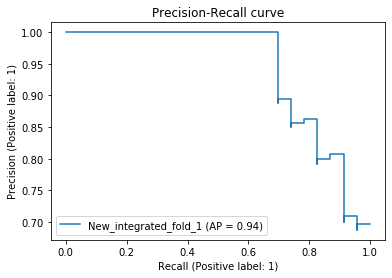

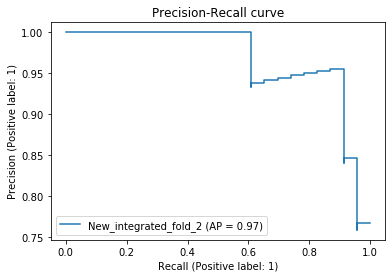

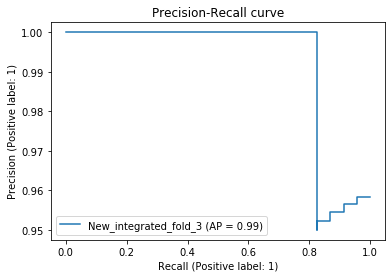

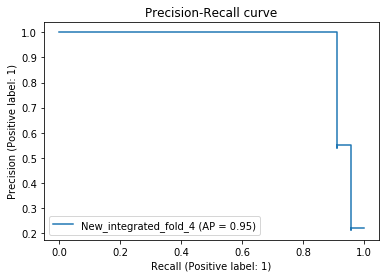

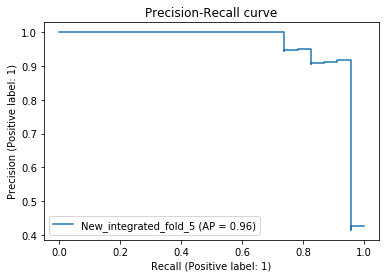

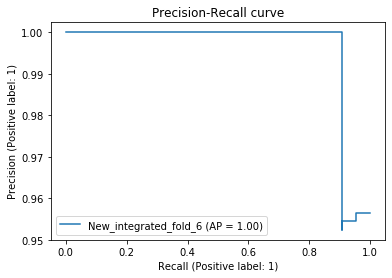

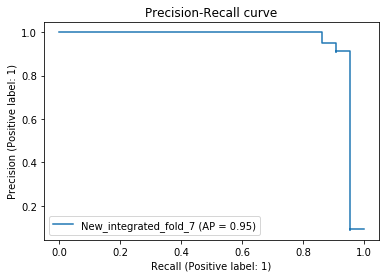

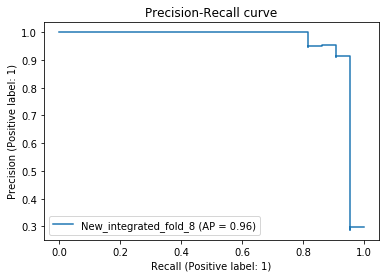

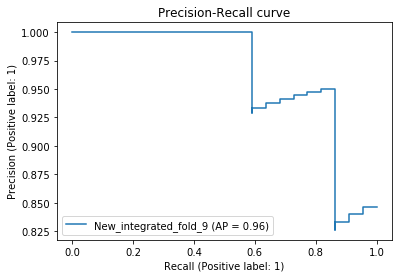

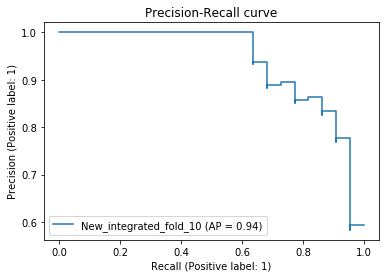

In [96]:
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

####################################################################################
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=2018)

X = df_training['text']
TX = np.array(X.tolist())

Y = df_training['label']
TY= np.array(Y.tolist())
####################################################################################

rep_fold = 1
pos_proba_ls = []
preds_ls = []
y_tests_ls = []

for train_index, test_index in skf.split(TX,TY):
    print('--------- Fold ',str(rep_fold),'-------------------------')
    print('Length train index....',len(train_index))
    print('Length test index....',len(test_index))
    
    #### training/testing data ########################################
    X_train, X_test = TX[train_index], TX[test_index]
    y_train, y_test = TY[train_index], TY[test_index]
        
    ####################################################################################
    ##### Build logical features #######################################################
    ####################################################################################
    Fold_train_logical_filters = Calculate_logical_filters(X_train)
    Fold_test_logical_filters = Calculate_logical_filters(X_test)

    print('Length training data (logic)',len(Fold_train_logical_filters))
    print('Length testing data (logic)',len(Fold_test_logical_filters))
    print('Length training vectors (logic)',len(Fold_train_logical_filters[0]))
    print('Length testing vectors (logic)',len(Fold_test_logical_filters[0]))
    
#     expanded_train_logical = []
#     for e in Fold_train_logical_filters:
#         l = e[1:]
#         expanded_e = expand_list(l)
#         expanded_train_logical.append(expanded_e) 
    
        
    expanded_test_logical = []
    for e in Fold_test_logical_filters: #logical_test_loc   #test_logical_features
        l = e[1:]
        expanded_e = expand_list(l)
        expanded_test_logical.append(expanded_e)  

    #print('Length expanded logical feature vector',len(expanded_train_logical[0]))
    print('Length expanded logical feature vector',len(expanded_test_logical[0]))
    
    length_logical_vec = len(expanded_test_logical[0])
    
    ####################################################################################
    ##### Build BERT features ##########################################################
    ####################################################################################
    # import BERT-base pretrained model
    bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

    # Load the BERT tokenizer
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased
    
    nb_layers = 1
    for param in bert.parameters():
        param.requires_grad = True
        
    # pass the pre-trained BERT to our define architecture
    fine_tuned_bert_model = BERT_Arch(bert,nb_layers)
    based_path_loaded_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Fine-tuned_BERT_IAN_IDA/10CV_models(2)/bert_weights_fold_'
    model_path = based_path_loaded_model + str(rep_fold) + '.pt'
    
    fine_tuned_bert_model.load_state_dict(torch.load(model_path))
    fine_tuned_bert_model.eval()
    
    # parameter 1
    max_seq_len = 36   ######### parameter 1 ###################
    
    ### clean X-train for BERT #####
#     cleaned_train_list= []
#     for e in X_train:
#         #cleaned_tweet = clean_text(e)
#         #tweet_clean = ' '.join(cleaned_tweet)
#         #cleaned_train_list.append(" ".join(clean_text_pipeline(e)))
#         cleaned_train_list.append(" ".join(clean_text_pipeline(e)))
                                      
    cleaned_test_list= []
    for e in X_test:
        cleaned_test_list.append(" ".join(clean_text_pipeline(e)))
    ################################
#     # tokenize and encode sequences in the training set
#     tokens_train = tokenizer.batch_encode_plus(
#                 X_train.tolist(),     #cleaned_train_list                
#                 padding='max_length',
#                 max_length = max_seq_len,
#                 truncation=True,
#                 return_token_type_ids=False
#             )

    # tokenize and encode sequences in the validation set
    tokens_test = tokenizer.batch_encode_plus(
            X_test.tolist(),            #cleaned_test_list                     
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )                                                                

    # for train set
    #train_seq = torch.tensor(tokens_train['input_ids'])
    #train_mask = torch.tensor(tokens_train['attention_mask'])
    #train_y = torch.tensor(y_train.tolist())

    # for test set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])
    test_y = torch.tensor(y_test.tolist())

#     with torch.no_grad():
#         outputs = fine_tuned_bert_model.bert(train_seq,train_mask)

    with torch.no_grad():
        outputs_test = fine_tuned_bert_model.bert(test_seq,test_mask)

#     ls_input_train = [e.numpy() for e in outputs[1]]
    ls_input_test = [e.numpy() for e in outputs_test[1]] 

    #print('Length training data (bert)',len(ls_input_train))
    print('Length testing data (bert)',len(ls_input_test))
    #print('Length training vectors (bert)',len(ls_input_train[0]))
    print('Length testing vectors (bert)',len(ls_input_test[0]))
    
    ####################################################################################
    ##### Build integrated architecture ################################################
    ####################################################################################

    #### parameters ##############
    learning_rate = Config_ls['lr']
    nb_epochs = Config_ls['nb_epochs']
    max_seq = Config_ls['max_seq']
    batch_size = Config_ls['batch_size']
    nb_layers =Config_ls['nb_layers']
    ##############################

    input_bert = Input(shape=(768,))
    input_logical = Input(shape=(length_logical_vec,)) #55 #60 ##80 #35
    
    #base_integrated_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Integrated_model_ian_ida(2)/Results_integrated_new_models_inference(3)/integrated__'
    base_integrated_model = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/___rescue_identification_experiments/Integrated_model_ian_ida(2)/Results_integrated_inference_(5)__selected_model/integrated__'

    model_integrated_path = base_integrated_model + str(rep_fold)+ '.h5' 
        
    ############# Build model ##############
    select_nb_layers_bert = 2
    if select_nb_layers_bert == 1:
        hid1 = 64
        x = Dense(hid1, activation="relu")(input_bert)
        b1 = Model(inputs=input_bert, outputs=x)

    if select_nb_layers_bert == 2:
        hid1 = 64
        hid2 = 128
        x = Dense(hid1, activation="relu")(input_bert)
        x = Dense(hid2, activation="relu")(x)
        b1 = Model(inputs=input_bert, outputs=x)

#     elif select_nb_layers_bert == 3:
#         hid1 = trial.suggest_categorical("bert_top_hidden_1",ls_hidden_units_bert)
#         hid2 = trial.suggest_categorical("bert_top_hidden_2",ls_hidden_units_bert)
#         hid3 = trial.suggest_categorical("bert_top_hidden_3",ls_hidden_units_bert)

#             x = Dense(hid1, activation="relu")(input_bert)
#             x = Dense(hid2, activation="relu")(x)
#             x = Dense(hid3, activation="relu")(x)
#             b1 = Model(inputs=input_bert, outputs=x)

    # combine the output of the two branches
    combined = concatenate([b1.output, input_logical]) ##y.output #input_logical

    ## add layers
    select_nb_layers_hybrid= 2
    if select_nb_layers_hybrid == 1:
        hybrid_top_hidden1 =  128    #32
        z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
        z = Dense(2, activation="softmax")(z1)

    elif select_nb_layers_hybrid == 2:
        hybrid_top_hidden1 = 128
        hybrid_top_hidden2 = 32 
        z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
        z1 = Dense(hybrid_top_hidden2, activation="relu")(z1)
        z = Dense(2, activation="softmax")(z1)

#     elif select_nb_layers_hybrid == 3:
#         hybrid_top_hidden1 = trial.suggest_categorical("hybrid_top_hidden_1",ls_hidden_units_hybrid)
#         hybrid_top_hidden2 = trial.suggest_categorical("hybrid_top_hidden_2",ls_hidden_units_hybrid)
#         hybrid_top_hidden3 = trial.suggest_categorical("hybrid_top_hidden_3",ls_hidden_units_hybrid)

#         z1 = Dense(hybrid_top_hidden1, activation="relu")(combined)
#         z1 = Dense(hybrid_top_hidden2, activation="relu")(z1)
#         z1 = Dense(hybrid_top_hidden3, activation="relu")(z1)
#         z = Dense(2, activation="softmax")(z1)


    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[b1.input,input_logical], outputs=z) 
    model.summary
    # Load the model
    loaded_model = load_model(model_integrated_path)

    print('---------- Start Inference -------------')
#     lr=Config_ls['lr']
#     batch=Config_ls['batch_size']
#     n_epochs = Config_ls['nb_epochs']
    
#     Train_hybrid_bert = np.array(ls_input_train)
#     Train_hybrid_logical = np.array(expanded_train_logical)
#     Train_hybrid_Y = np.array(y_train)

#     Test_hybrid_bert = np.array(ls_input_test)
#     Test_hybrid_logical = np.array(expanded_test_logical)
#     Test_hybrid_Y = np.array(y_test)
    
#     model.compile(optimizer=keras.optimizers.Adam(lr),
#             loss=keras.losses.SparseCategoricalCrossentropy(),  
#             metrics=[keras.metrics.SparseCategoricalCrossentropy()], 
#         )

#     history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=batch, epochs=n_epochs,verbose=2) 
#     model.save(model_integrated_path)
    
    ########################################
    #Integrated_model = keras.models.load_model(model_integrated_path)
    #Integrated_model.summary()

#     Train_hybrid_bert = np.array(ls_input_train)
#     Train_hybrid_logical = np.array(expanded_train_logical)
#     Train_hybrid_Y = np.array(y_train.tolist())

    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(expanded_test_logical)
    Test_hybrid_Y = np.array(y_test.tolist())

    predictions_probs = loaded_model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions_probs, axis=1)
    dict_r = classification_report(y_test.tolist(), preds, output_dict = True)

    ### calculate probs for precision-recall curve calculation #####
    pos_probs = predictions_probs[:, 1]
    fold_ap = {rep_fold: {'pos_proba':pos_probs,'y_test':y_test.tolist()}}
    preds_AP.append(fold_ap)

    fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    print("AP score for class 1 --->",fold_AP)

    name_plot_fold = 'New_integrated_fold_' + str(rep_fold)
    name_plot_fold_output = 'New_integrated_fold_' + str(rep_fold) + '.png'
    display = PrecisionRecallDisplay.from_predictions(y_test.tolist(), pos_probs, name=name_plot_fold)
    _ = display.ax_.set_title("Precision-Recall curve")
    #plt.savefig(name_plot_fold_output)

    df_list = [X_test,preds,test_y.tolist()]
    df = pd.DataFrame(df_list, index=['test_X','preds','test_y']).T
    file_path = 'New_integrated_res_fold_' + str(rep_fold) + '.csv'
    df.to_csv(file_path)

    _fold_AP = average_precision_score(y_test.tolist(),pos_probs)
    print("AP score for class 1 --->",_fold_AP)
    save_results['AP'].append(_fold_AP)
    ################################################################
    
    ### calculate results
    _f1 = dict_r['1']['f1-score']
    save_results['f1'].append(_f1)
    _recall = dict_r['1']['recall']
    save_results['recall'].append(_recall)
    _precision = dict_r['1']['precision']
    save_results['precision'].append(_precision)
    
    pos_proba_ls.append(pos_probs)
    preds_ls.append(preds)
    y_tests_ls.append(y_test.tolist())

    print('f1-score......',_f1)
    print('recall......',_recall)
    print('recall......',_precision)
    
    fold_results = {'AP':_fold_AP,'report':dict_r,'f1':_f1,'recall':_recall,'precision':_precision}
    
    #del fine_tuned_bert_model_integrated
    #del model
    torch.cuda.empty_cache()

    rep_fold = rep_fold + 1
    print('------------------------------------------------------')
    

In [97]:
proposed = save_results

In [99]:
import statistics

print('---------------- Integrated BERT 10-cv results----------------')
print('average F1',statistics.mean(proposed['f1']))
print('stdev F1',statistics.stdev(proposed['f1']))
print('\n') 

print('average recall',statistics.mean(proposed['recall']))
print('stdev recall',statistics.stdev(proposed['recall']))
print('\n')

print('average precision',statistics.mean(proposed['precision']))
print('stdev precision',statistics.stdev(proposed['precision']))
print('\n')

print('average AP',statistics.mean(proposed['AP']))
print('stdev AP',statistics.stdev(proposed['AP']))

---------------- Integrated BERT 10-cv results----------------
average F1 0.9047388991197634
stdev F1 0.04667332880041603


average recall 0.9114624505928853
stdev recall 0.06662811927489923


average precision 0.9013629044063827
stdev precision 0.05637270085366947


average AP 0.9614665601126179
stdev AP 0.019565231962453803


In [68]:
import statistics

print('---------------- Fine-tuned BERT 10-cv results----------------')
print('average F1',statistics.mean(BERT_linear['f1']))
print('stdev F1',statistics.stdev(BERT_linear['f1']))
print('\n') 

print('average recall',statistics.mean(BERT_linear['recall']))
print('stdev recall',statistics.stdev(BERT_linear['recall']))
print('\n')

print('average precision',statistics.mean(BERT_linear['precision']))
print('stdev precision',statistics.stdev(BERT_linear['precision']))
print('\n')

print('average AP',statistics.mean(BERT_linear['AP']))
print('stdev AP',statistics.stdev(BERT_linear['AP']))

---------------- Fine-tuned BERT 10-cv results----------------
average F1 0.8774517438127467
stdev F1 0.04424493705913978


average recall 0.8891304347826087
stdev recall 0.06048026412986514


average precision 0.8693450969320534
stdev precision 0.05899221361737003


average AP 0.9431206617641461
stdev AP 0.032935904951660266


In [100]:
#BERT_linear = save_results
proposed_results = save_results

In [101]:
# Importing library 
import scipy.stats as stats 
  
# pre holds the mileage before  
# applying the different engine oil 
pre = BERT_linear['AP']
  
# post holds the mileage after  
# applying the different engine oil 
post = proposed_results['AP']
  
# Performing the paired sample t-test 
stats.ttest_rel(pre, post) 

Ttest_relResult(statistic=-2.2940067346952175, pvalue=0.047462528150840955)

In [102]:
# Importing library 
import scipy.stats as stats 
  
# pre holds the mileage before  
# applying the different engine oil 
pre = BERT_linear['f1']
  
# post holds the mileage after  
# applying the different engine oil 
post = proposed_results['f1']
  
# Performing the paired sample t-test 
stats.ttest_rel(pre, post) 

Ttest_relResult(statistic=-4.976478403301077, pvalue=0.0007631071749719595)

In [103]:
# Importing library 
import scipy.stats as stats 
  
# pre holds the mileage before  
# applying the different engine oil 
pre = BERT_linear['recall']
  
# post holds the mileage after  
# applying the different engine oil 
post = proposed_results['recall']
  
# Performing the paired sample t-test 
stats.ttest_rel(pre, post) 

Ttest_relResult(statistic=-2.9985913287687893, pvalue=0.014990567396727092)

In [104]:
# Importing library 
import scipy.stats as stats 
  
# pre holds the mileage before  
# applying the different engine oil 
pre = BERT_linear['precision']
  
# post holds the mileage after  
# applying the different engine oil 
post = proposed_results['precision']
  
# Performing the paired sample t-test 
stats.ttest_rel(pre, post) 

Ttest_relResult(statistic=-2.2436971205113934, pvalue=0.0515311353202352)